In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


**Customer Segmentation is a practice of dividing customers into groups that are similiar in specific ways.**
It became essential nowadays to understand our customers which will increase the revenue of our company. It will generate a better understanding between a customer and a organization.

****Step 1: Importing the data set**


In [26]:
df=pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.descibe()

**Gender color contains categorical value so we have to change it into numerical values**

In [27]:
df["Gender"]=df["Gender"].replace("Male",1)
df["Gender"]=df["Gender"].replace("Female",0)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Checking if any column contains null value**

In [28]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
df.shape

(200, 5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


**Exploratory Data Analysis**
finding the relationship between different data members in the dataset

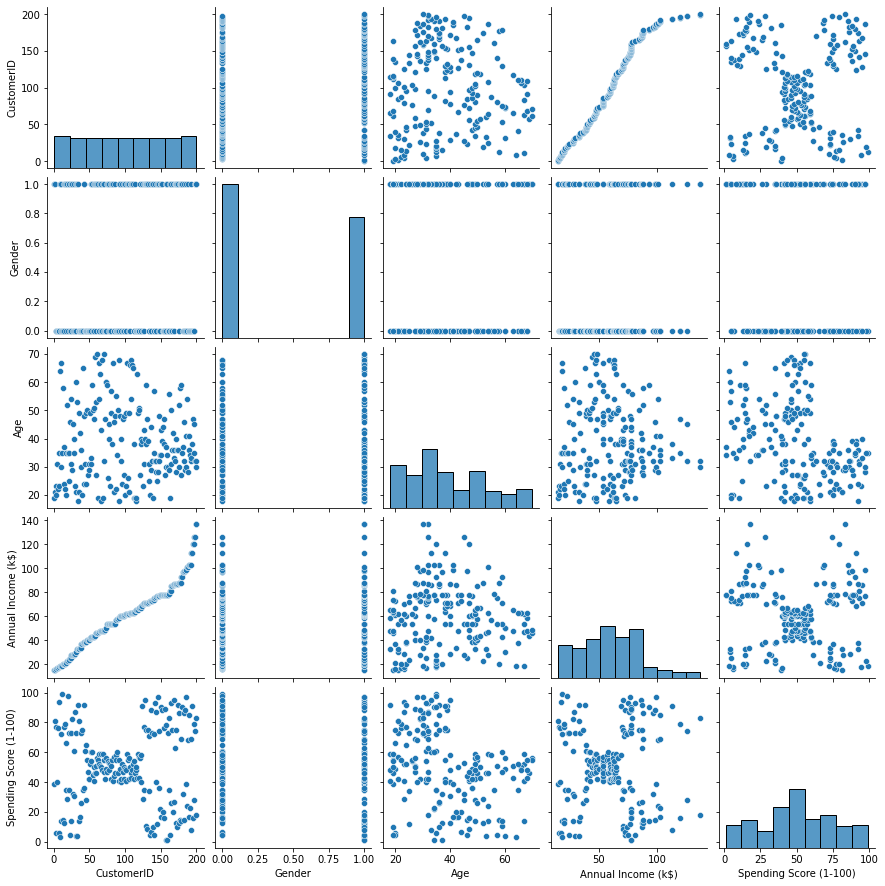

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)

**Splitting the customers between various age groups**

In [32]:

age18_25=df.Age[(df.Age>=18) & (df.Age<=25)]
age26_35=df.Age[(df.Age>=26) & (df.Age<=35)]
age36_45=df.Age[(df.Age>=36) & (df.Age<=45)]
age45_55=df.Age[(df.Age>=45) & (df.Age<=55)]
age55above=df.Age[(df.Age>=56)]
agex=["age18_25","age26_35","age36_45","age45_55","age55above"]
agey=[len(age18_25),len(age26_35),len(age36_45),len(age45_55),len(age55above)]

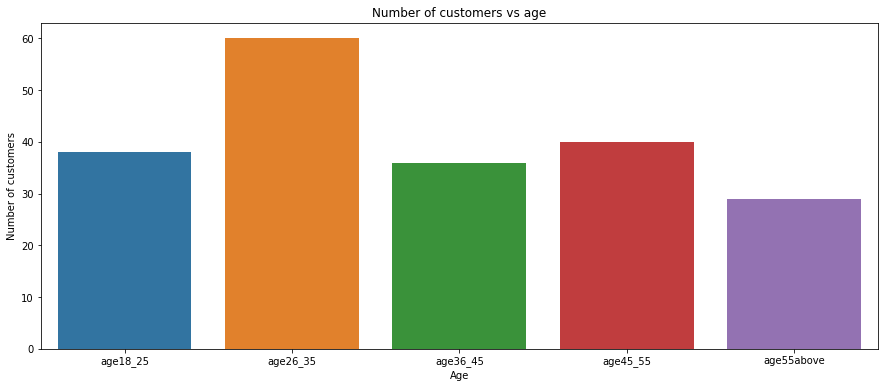

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey)
plt.title("Number of customers vs age")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

**From the above graph we generalize that maximum number of customers lie between the age of 26 to 35**

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


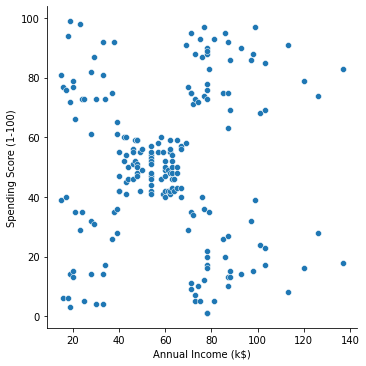

In [34]:

sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)

****From above graph we infer that the customers whoes annual income lies between 40k to 60k has a spending score between 40 to 60

**Splitting the customers on basis of their annual income**

In [35]:
an0_30=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0) & (df["Annual Income (k$)"]<=30)]
an31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31) & (df["Annual Income (k$)"]<=60)]
an61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61) & (df["Annual Income (k$)"]<=90)]
an90above=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91)]
anux=["an0_30","an31_60","an61_90","an90above"]
anuy=[len(an0_30),len(an31_60),len(an61_90),len(an90above)]

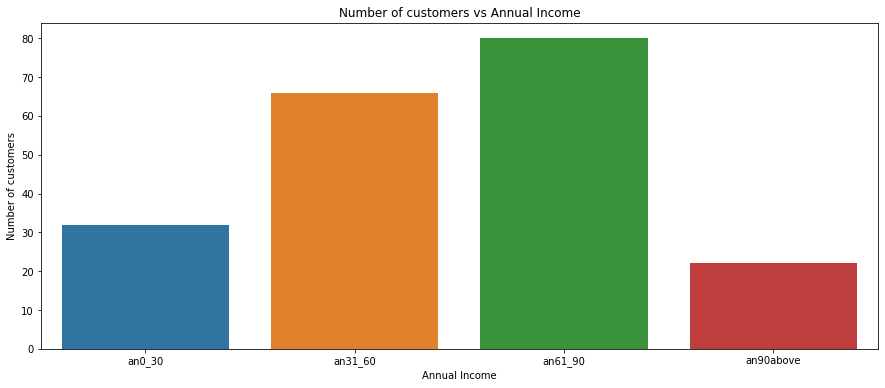

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(x=anux,y=anuy)
plt.title("Number of customers vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of customers")
plt.show()

**from above graph we infer that maximum number of customers have annual income between 60-90**

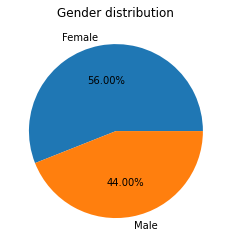

In [37]:
labels=["Female","Male"]
size=df["Gender"].value_counts()
plt.pie(size,labels=labels,autopct = '%.2f%%')
plt.title("Gender distribution")
plt.show()

***We can infer from the above chart that female visitors are high in the mall as compared to men***

**Step 3: Using KMeans Algorithm to divide the customers into clusters**

****

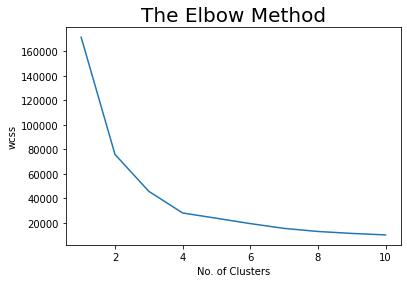

In [49]:
X1=df.loc[:,["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    km = KMeans(n_clusters = k, init = 'k-means++')
    km.fit(X1)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**We got the optimal value of cluster i.e 4**

In [50]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


Text(0, 0.5, 'Spending Score (1-100)')

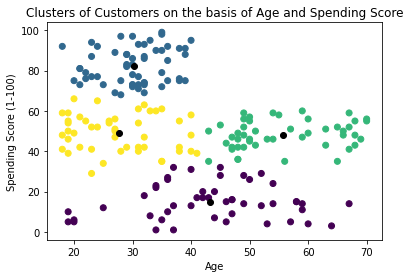

In [51]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("Clusters of Customers on the basis of Age and Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

**This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall.**

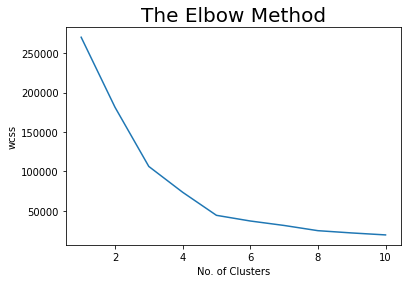

In [52]:
X2=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    km = KMeans(n_clusters = k, init = 'k-means++')
    km.fit(X2)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**From the above graph optimum value of clusters is 5**

In [53]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)
print(label)

[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 4 2 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 1 3 4 3 1 3 1 3 4 3 1 3 1 3 1 3 1 3 4 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


Text(0, 0.5, 'Spending Score (1-100)')

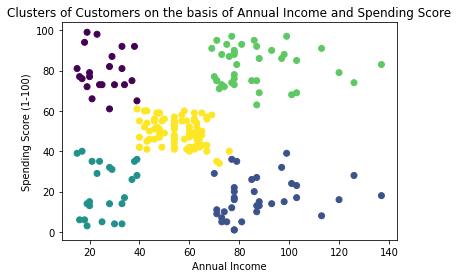

In [55]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("Clusters of Customers on the basis of Annual Income and Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")

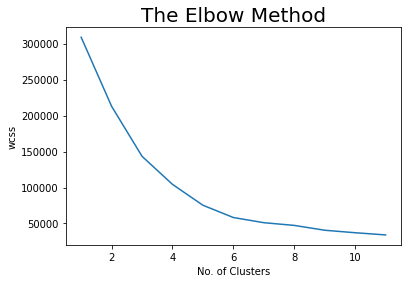

In [57]:
X3=df.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,12):
    km = KMeans(n_clusters = k, init = 'k-means++')
    km.fit(X3)
    wcss.append(km.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Optimum value of Cluster is 5**

In [81]:
kmeans=KMeans(n_clusters=6)
label=kmeans.fit_predict(X3)
print(label)

[5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5
 0 5 0 1 0 1 4 5 0 1 4 4 4 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
 4 4 4 4 4 1 1 1 1 4 4 4 3 4 3 2 3 2 3 2 3 4 3 2 3 2 3 2 3 2 3 4 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


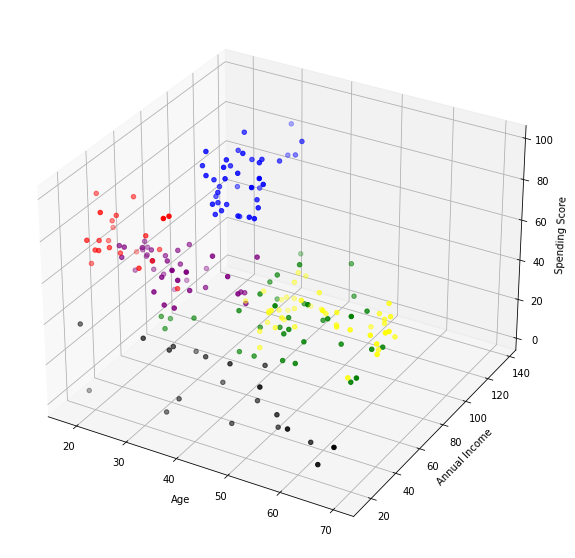

In [83]:
from mpl_toolkits.mplot3d import Axes3D
df["label"]=label
# Creating figure
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter(df.Age[df.label==0],df["Annual Income (k$)"][df.label==0],df["Spending Score (1-100)"][df.label==0],color="red")
ax.scatter(df.Age[df.label==1],df["Annual Income (k$)"][df.label==1],df["Spending Score (1-100)"][df.label==1],color="yellow")
ax.scatter(df.Age[df.label==2],df["Annual Income (k$)"][df.label==2],df["Spending Score (1-100)"][df.label==2],color="green")
ax.scatter(df.Age[df.label==3],df["Annual Income (k$)"][df.label==3],df["Spending Score (1-100)"][df.label==3],color="blue")
ax.scatter(df.Age[df.label==4],df["Annual Income (k$)"][df.label==4],df["Spending Score (1-100)"][df.label==4],color="purple")
ax.scatter(df.Age[df.label==5],df["Annual Income (k$)"][df.label==5],df["Spending Score (1-100)"][df.label==5],color="black")

plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel("Spending Score")
plt.show()

****We can clearly see the 6 cluster with distinct separation between each datapoints.
using this info we can run target advertisment for diffrent group with diffrent need.
 to increase our sales and profit.**